In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

La prueba de asentamiento del concreto mide la consistencia del concreto fresco antes de que fragüe. Se realiza para comprobar la trabajabilidad del concreto recién hecho y, por tanto, la facilidad con la que este fluye. También se puede utilizar como indicador de un lote mal mezclado.

El dataset tambien cuenta con una columna que indica la de resistencia a la compresion uniaxal del concreto 28 dias despues de realizado el test.

<font color="blue">Variables</font><br>

- **Cement** - Cemento, densidad en kg/m3<br>
- **Slag** - Escoria, densidad en kg/m3<br>
- **Fly ash** - Cenizas voladoras, densidad en kg/m3<br>
- **Water** - Agua, densidad en kg/m3<br>
- **SP** (superplasticizer) -  plastificante, densidad en kg/m3<br>
- **Coarse Aggr.** - Agregado de cuarzo, densidad en kg/m3<br>
- **Fine Aggr.** - Agregado de fino, densidad en kg/m3<br>
- **SLUMP** - (diferencia vertical) centimetros (cm) (ver imagen adjuntada)<br>
- **FLOW** - (extension horizontal) (cm) (ver imagen adjuntada)<br>
- **28-day Compressive Strength** - Resistencia a la compresion Uniaxial 28 dias despues, megapascales (MPA)<br>

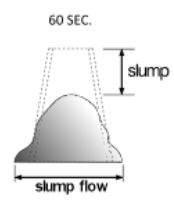

<img src="https://www.engineeringcivil.com/wp-content/uploads/2010/09/types-of-concrete-slump.JPG"/>

In [106]:
df = pd.read_csv("cement_slump.csv")
df.rename(columns={"Compressive Strength (28-day)(Mpa)": "UCS(MPA)"}, inplace=True)

In [107]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),UCS(MPA)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cement        103 non-null    float64
 1   Slag          103 non-null    float64
 2   Fly ash       103 non-null    float64
 3   Water         103 non-null    float64
 4   SP            103 non-null    float64
 5   Coarse Aggr.  103 non-null    float64
 6   Fine Aggr.    103 non-null    float64
 7   SLUMP(cm)     103 non-null    float64
 8   FLOW(cm)      103 non-null    float64
 9   UCS(MPA)      103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [109]:
df.describe().round(2)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),UCS(MPA)
count,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00,103.00
mean,229.89,77.97,149.01,197.17,8.54,883.98,739.60,18.05,49.61,36.04
std,78.88,60.46,85.42,20.21,2.81,88.39,63.34,8.75,17.57,7.84
min,137.00,0.00,0.00,160.00,4.40,708.00,640.60,0.00,20.00,17.19
25%,152.00,0.05,115.50,180.00,6.00,819.50,684.50,14.50,38.50,30.90
50%,248.00,100.00,164.00,196.00,8.00,879.00,742.70,21.50,54.00,35.52
75%,303.90,125.00,235.95,209.50,10.00,952.80,788.00,24.00,63.75,41.20
max,374.00,193.00,260.00,240.00,19.00,1049.90,902.00,29.00,78.00,58.53


In [110]:
# No hay datos nulos en el dataset para ninguna de las variables.

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cement,0,0.0
Slag,0,0.0
Fly ash,0,0.0
Water,0,0.0
SP,0,0.0
Coarse Aggr.,0,0.0
Fine Aggr.,0,0.0
SLUMP(cm),0,0.0
FLOW(cm),0,0.0
UCS(MPA),0,0.0


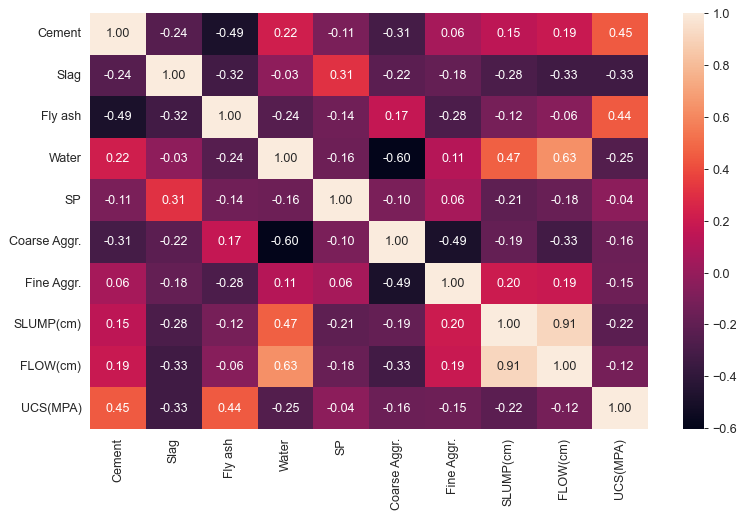

In [111]:
# matriz de correlaciones lineales, recordar que correlacion no implica causalidad.
# Slump fuertemente relacionado con Flow, lo cual tiene un sentido fisico logico.
# Las variables mas fuertemente correlacionadas con el UCS son Cement y Fly Ash
plt.figure(figsize=(10, 6), dpi=90)
sns.heatmap(data=df.corr(), annot=True, fmt=".2f");

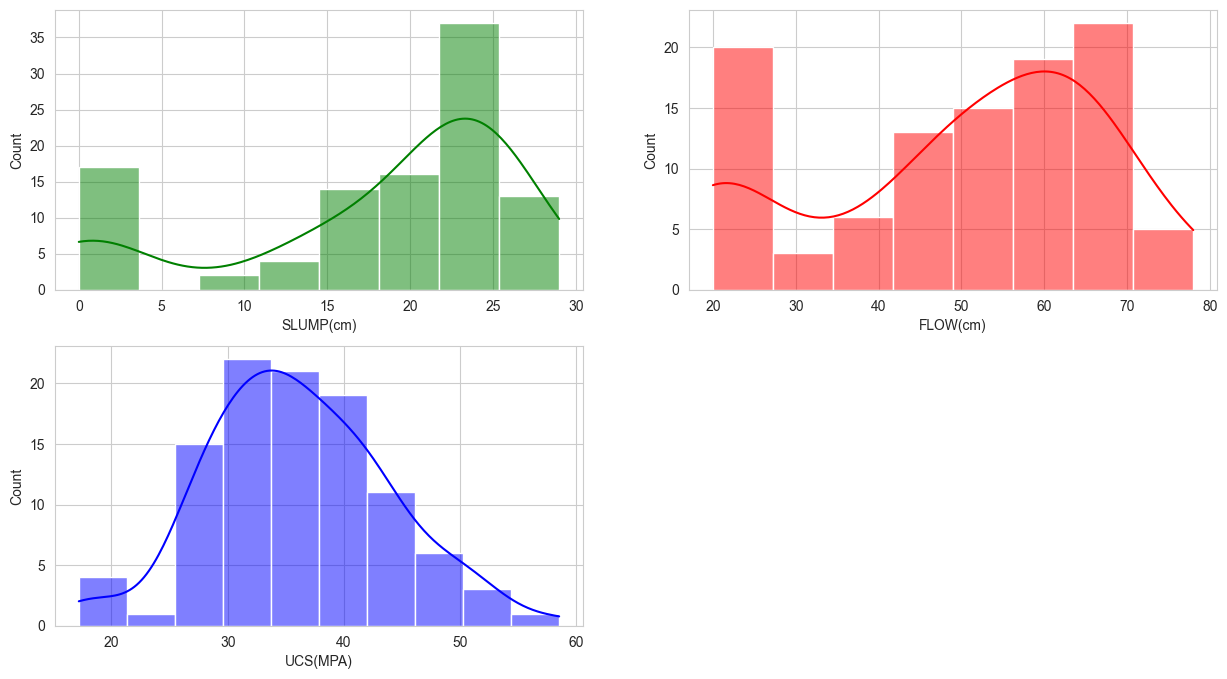

In [112]:
# se observa una distribucion mas o menos normal para el UCS, un poquito sesgada hacia la derecha
# Media > mediana > Moda
# Se observa que slump y flow tienen distribuciones muy parecidas.
z = ["SLUMP(cm)", "FLOW(cm)", "UCS(MPA)"]
color = ["blue", "red", "green"]

plt.figure(figsize=(15, 8), dpi=100)

for n, value in enumerate(z):
    plt.subplot(2, 2, n + 1)
    sns.histplot(x=df[value], multiple="stack", color=color.pop(), kde=True)


Se intuye de este grafico que una mayor cantidad de agua, generalmente implica valores mas elevados de Slump y FLOW.

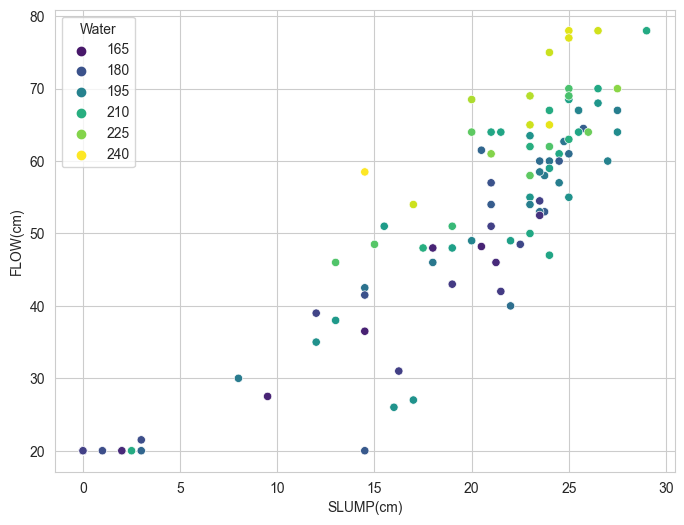

In [113]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(x=df["SLUMP(cm)"], y=df["FLOW(cm)"], hue=df["Water"], palette="viridis");

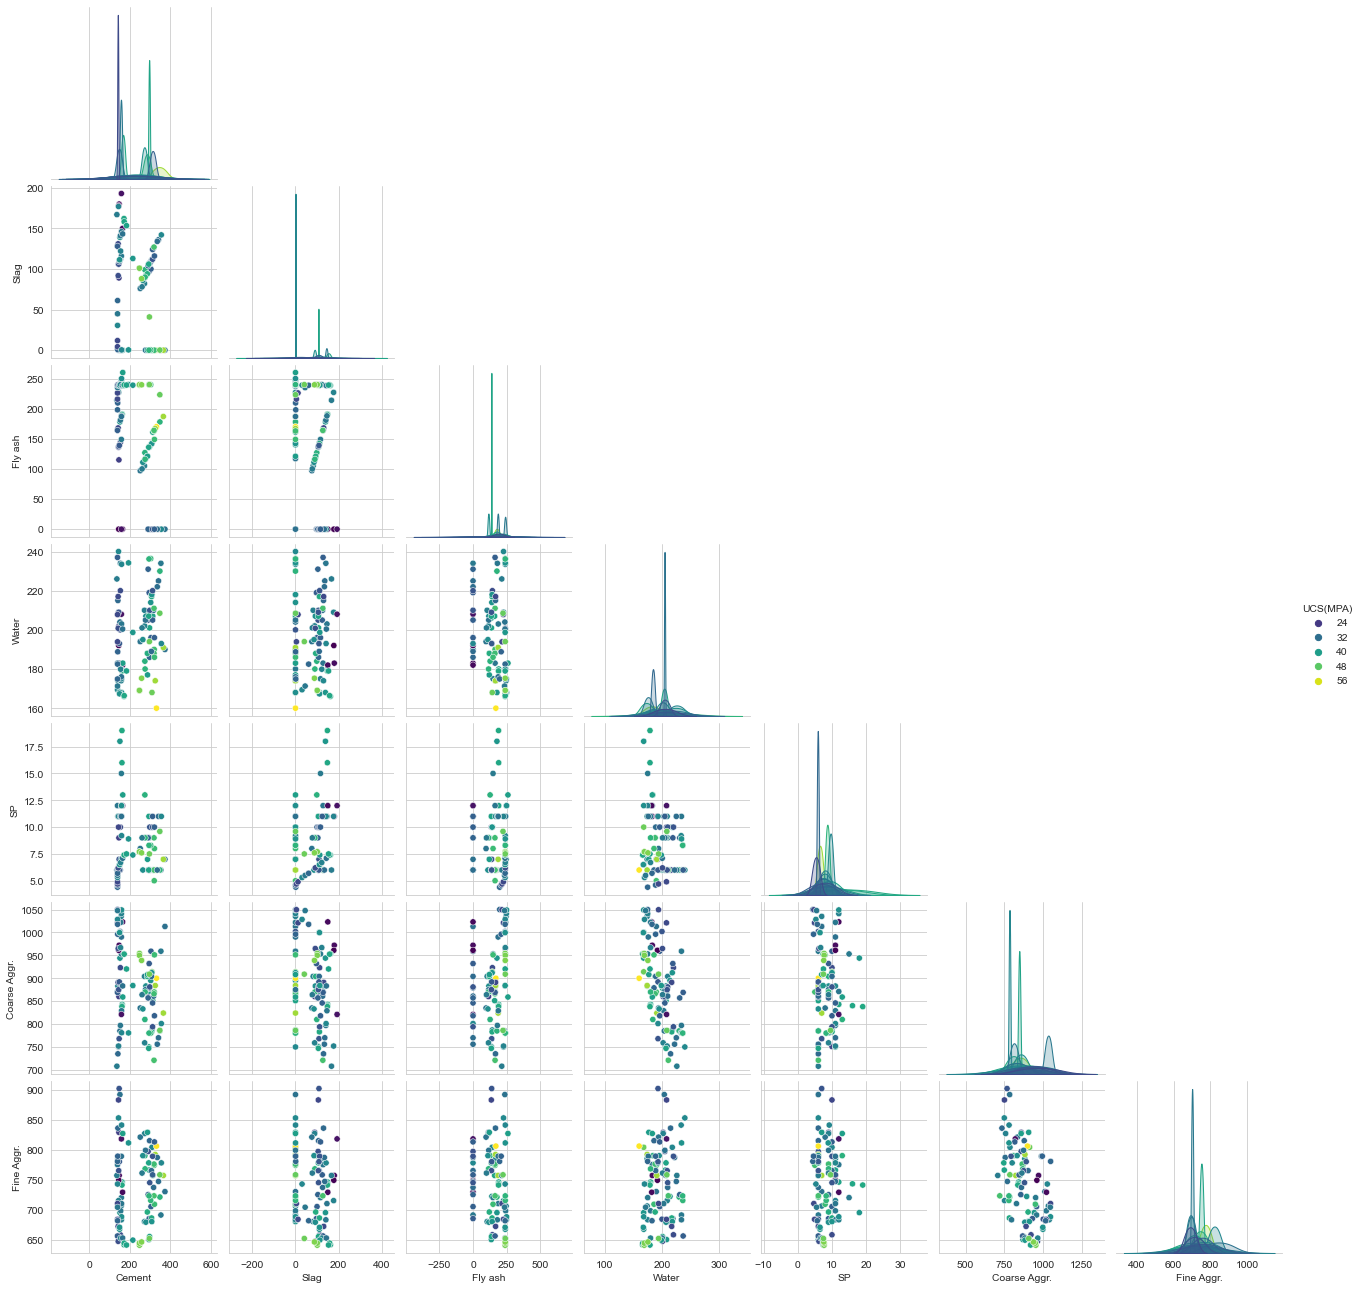

In [114]:
sns.pairplot(data=df.drop(["FLOW(cm)", "SLUMP(cm)"], axis=1), hue="UCS(MPA)", corner=True,
             diag_kind='kde', palette="viridis");

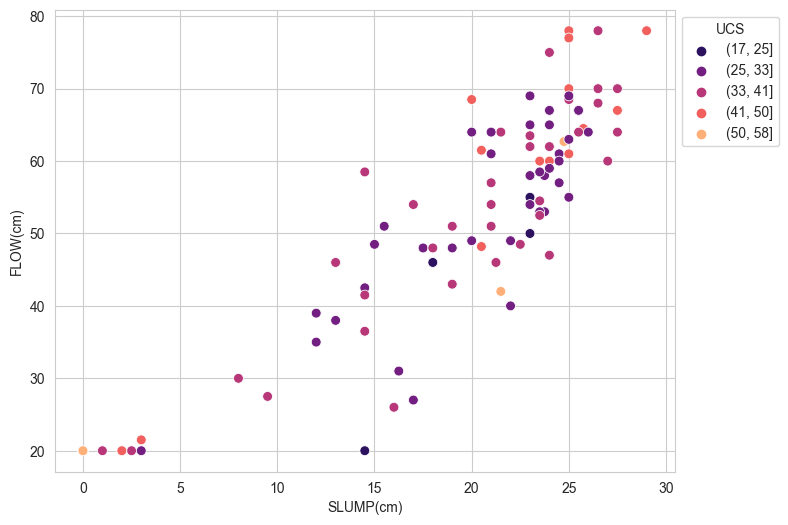

In [115]:
plt.figure(figsize=(8, 6), dpi=100)


bins = 5

edges = np.linspace(df["UCS(MPA)"].min(), df["UCS(MPA)"].max(), bins+1).astype(int)
labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]

sns.scatterplot(x=df["SLUMP(cm)"], y=df["FLOW(cm)"], hue=pd.cut(df["UCS(MPA)"],bins=bins, labels=labels),
                                                                palette= "magma", s=50)

plt.legend(title="UCS", bbox_to_anchor=([1,1,0,0]));

Se observa de los graficos que una **menor** cantidad de agua (por ende slump y flow) y escoria estan relacionadas con un mayor UCS
(relacion inversa), tambien se observa que mayores cantidades de cemento y cenizas voladoras podrian aumentar el
UCS (relacion directa).

<font color="red" size=6>Modelos de machine learning</font>

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
import warnings
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [170]:
X = df.drop("UCS(MPA)", axis=1)
y = df["UCS(MPA)"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train = X_train.reset_index(drop=True)

In [119]:
def reg_report_model(model_preds, y_test=y_test):
    print("MAE: ", mean_absolute_error(y_test, model_preds))
    print("RMSE :", mean_squared_error(y_test, model_preds) ** 0.5)
    print("MSE :", mean_squared_error(y_test, model_preds))

<font color="red" size="6"> Random Forest</font>

In [120]:
def objective(trial, X, y):
    params = {
        #'n_jobs': -1,
        'random_state': 42,
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt"]),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=25),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60), }

    cv = KFold(n_splits=5, shuffle=True, random_state=12)  #, random_state=123)
    y = y.values
    cv_scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model = RandomForestRegressor(**params)
        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", model)])

        pipeline.fit(X_train, y_train)

        preds = pipeline.predict(X_val)
        cv_score = mean_squared_error(y_val, preds, squared=False)
        cv_scores.append(cv_score)

        z = np.mean(cv_scores)

        trial.report(z, idx)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(cv_scores)

In [121]:
study = optuna.create_study(direction='minimize', sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(20, n_startup_trials=5, n_warmup_steps=2))

func = lambda trial: objective(trial, X_train, y_train)

study.optimize(func, n_trials=100)

[I 2023-02-24 00:24:36,485] A new study created in memory with name: no-name-365f8e15-f7e7-4c2c-8835-7c4e470585e5
[I 2023-02-24 00:24:36,850] Trial 0 finished with value: 6.18426864261906 and parameters: {'max_features': 'sqrt', 'n_estimators': 275, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 15}. Best is trial 0 with value: 6.18426864261906.
[I 2023-02-24 00:24:37,133] Trial 1 finished with value: 4.16201217845798 and parameters: {'max_features': 'auto', 'n_estimators': 225, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 1 with value: 4.16201217845798.
[I 2023-02-24 00:24:37,260] Trial 2 finished with value: 7.901032374863986 and parameters: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 54}. Best is trial 1 with value: 4.16201217845798.
[I 2023-02-24 00:24:37,656] Trial 3 finished with value: 7.877350318091101 and parameters: {'max_features': 'sqrt', 'n_estimators': 325, 'max

In [124]:
params = study.best_params

model = RandomForestRegressor(**params)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("rf", model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=19, n_estimators=350))])

In [125]:
preds = pipe.predict(X_test)

In [126]:
reg_report_model(preds, y_test)

MAE:  2.2308367346938875
RMSE : 2.9406678899775174
MSE : 8.647527639144824


<font color="red" size="6">LightGBM</font>

In [127]:
params = LGBMRegressor().get_params()
print(params)

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [128]:
# For large number of n_estimators (large dataset) i should use earlystopping and the LGBM Prunning.
warnings.filterwarnings("ignore")


def objective(trial, X, y):
    param_grid = {
        "random_state": 123,
        "verbosity": -1,
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),  #,"goss"]),
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 45, 225, step=10),
        #for large datasets this should be very high
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2000, step=20),
        "max_depth": trial.suggest_int("max_depth", 2, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 30, step=2),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 0.0001, 100),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 0.0001, 100),
        "min_split_gain": trial.suggest_float("min_split_gain", 0, 15),
        #"subsample": trial.suggest_float("subsample", 0.3, 1, step=0.1),
        #"subsample_freq": trial.suggest_categorical("subsample_freq", [0,1]), 
        #"colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1, step=0.1),
    }

    def rmse(y_val, y_pred):
        is_higher_better = False
        name = "rmse"
        value = mean_squared_error(y_val, y_pred, squared=False)
        return name, value, is_higher_better

    cv = KFold(n_splits=5, shuffle=True, random_state=12)  #, random_state=123)
    y = y.values
    cv_scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model = LGBMRegressor(objective="regression", silent=True, **param_grid)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        pipeline = Pipeline([("model", model)])

        pipeline.fit(X_train, y_train, **{"model__eval_set": [(X_val, y_val)]
            , "model__eval_metric": rmse,
                                          "model__early_stopping_rounds": 200, "model__verbose": 0,
                                          "model__callbacks": [
                                              LightGBMPruningCallback(trial, "rmse", report_interval=25)]})
        #             categorical_feature=cat_idx, #specifiy categorial features.

        preds = pipeline.predict(X_val)
        cv_score = mean_squared_error(y_val, preds, squared=False)
        cv_scores.append(cv_score)

        #z = np.mean(cv_scores)
        #trial.report(z, idx)

        #if trial.should_prune():
        #raise optuna.TrialPruned()

    return np.mean(cv_scores)

In [129]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor", sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(50, n_startup_trials=5, n_warmup_steps=50))
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=100)

[I 2023-02-24 00:25:41,537] A new study created in memory with name: LGBM Regressor
[I 2023-02-24 00:25:46,845] Trial 0 finished with value: 3.5168133565248483 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 105, 'learning_rate': 0.18848591090128902, 'num_leaves': 762, 'max_depth': 3, 'min_child_samples': 9, 'reg_alpha': 0.0001748610251830202, 'reg_lambda': 0.0003195934703837967, 'min_split_gain': 12.883395304745571}. Best is trial 0 with value: 3.5168133565248483.
[I 2023-02-24 00:25:47,920] Trial 1 finished with value: 3.359108678334114 and parameters: {'boosting_type': 'gbdt', 'device_type': 'gpu', 'n_estimators': 105, 'learning_rate': 0.0946428936100972, 'num_leaves': 1442, 'max_depth': 12, 'min_child_samples': 3, 'reg_alpha': 0.18125388928442582, 'reg_lambda': 0.9888310855751218, 'min_split_gain': 5.3200328125647305}. Best is trial 1 with value: 3.359108678334114.
[I 2023-02-24 00:25:49,008] Trial 2 finished with value: 3.9282045069094935 and parame

In [130]:
params = study.best_params

In [131]:
model = LGBMRegressor(**params, verbosity=-1)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("lgb", model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lgb',
                 LGBMRegressor(device_type='gpu',
                               learning_rate=0.22243754831616147, max_depth=5,
                               min_child_samples=11,
                               min_split_gain=0.07131550362072925,
                               n_estimators=55, num_leaves=1922,
                               reg_alpha=0.038984391480286734,
                               reg_lambda=0.6142382685859759, verbosity=-1))])

In [132]:
preds = pipe.predict(X_test)

In [133]:
reg_report_model(preds, y_test)

MAE:  1.7432621654092304
RMSE : 2.220196868433799
MSE : 4.929274134603248


<font color="red" size="6"> Linear Regression (ElasticNet)</font>

In [134]:
warnings.filterwarnings("ignore")


def objective(trial, X, y):
    params = {
        'random_state': 42,
        'l1_ratio': trial.suggest_float('l1_ratio', 0, 1),
        'alpha': trial.suggest_loguniform("alpha", 0.001, 1000), }

    cv = KFold(n_splits=5, shuffle=True, random_state=12)  #, random_state=123)
    y = y.values
    cv_scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model = ElasticNet(**params)
        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", model)])

        pipeline.fit(X_train, y_train)

        preds = pipeline.predict(X_val)
        cv_score = mean_squared_error(y_val, preds, squared=False)
        cv_scores.append(cv_score)

        z = np.mean(cv_scores)

        trial.report(z, idx)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(cv_scores)

In [135]:
study = optuna.create_study(direction='minimize', sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(20, n_startup_trials=5, n_warmup_steps=2))
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=100)

[I 2023-02-24 00:26:33,713] A new study created in memory with name: no-name-f0438db8-22e0-4629-80e6-885d027d2615
[I 2023-02-24 00:26:33,759] Trial 0 finished with value: 7.458233978616718 and parameters: {'l1_ratio': 0.46856108153222986, 'alpha': 4.231957956155986}. Best is trial 0 with value: 7.458233978616718.
[I 2023-02-24 00:26:33,796] Trial 1 finished with value: 2.7659735185340337 and parameters: {'l1_ratio': 0.6233815404540523, 'alpha': 0.001847960598642503}. Best is trial 1 with value: 2.7659735185340337.
[I 2023-02-24 00:26:33,819] Trial 2 finished with value: 7.498059990829752 and parameters: {'l1_ratio': 0.396146029064503, 'alpha': 4.706775680080341}. Best is trial 1 with value: 2.7659735185340337.
[I 2023-02-24 00:26:33,844] Trial 3 finished with value: 3.8215770877921464 and parameters: {'l1_ratio': 0.36962191379047227, 'alpha': 0.43188806123582274}. Best is trial 1 with value: 2.7659735185340337.
[I 2023-02-24 00:26:33,870] Trial 4 finished with value: 4.675563122166357 

In [136]:
params = study.best_params

model = ElasticNet(**params)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("elastic_model", model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic_model',
                 ElasticNet(alpha=0.011314820662724842,
                            l1_ratio=0.0015700184142978038))])

In [137]:
preds = pipe.predict(X_test)

In [138]:
reg_report_model(preds, y_test)

MAE:  1.7322210516853562
RMSE : 2.1178680391060207
MSE : 4.485365031066781


<font color="red" size="6"> Support Vector Machine</font>

In [172]:
def objective(trial, X, y):
    params = {
        'C': trial.suggest_loguniform('C', 0.01, 1000),
        'epsilon': trial.suggest_float("epsilon", 0.0001, 10),
        'gamma': trial.suggest_categorical("gamma", ['scale', "auto"]),
        'kernel': trial.suggest_categorical("kernel", ['rbf', "linear", "poly"]),
        'degree': trial.suggest_int("degree", 1, 4)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=12)
    y = y.values
    cv_scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model = SVR(**params)
        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", model)])

        pipeline.fit(X_train, y_train)

        preds = pipeline.predict(X_val)
        cv_score = mean_squared_error(y_val, preds, squared=False)
        cv_scores.append(cv_score)

        z = np.mean(cv_scores)

        trial.report(z, idx)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(cv_scores)

In [177]:
study = optuna.create_study(direction='minimize', sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(25, n_startup_trials=5, n_warmup_steps=2))
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

[I 2023-02-24 00:34:34,093] A new study created in memory with name: no-name-2f74a1db-dcca-4ce1-bf45-95d630e1b33d
[I 2023-02-24 00:34:34,131] Trial 0 finished with value: 7.753022157691708 and parameters: {'C': 0.03620630702240599, 'epsilon': 8.121909691536374, 'gamma': 'scale', 'kernel': 'rbf', 'degree': 4}. Best is trial 0 with value: 7.753022157691708.
[I 2023-02-24 00:34:34,170] Trial 1 finished with value: 3.612969030184331 and parameters: {'C': 213.46201715078922, 'epsilon': 5.800375879568902, 'gamma': 'auto', 'kernel': 'linear', 'degree': 2}. Best is trial 1 with value: 3.612969030184331.
[I 2023-02-24 00:34:34,200] Trial 2 finished with value: 7.93906857041554 and parameters: {'C': 0.040872150009029905, 'epsilon': 0.4599863917189965, 'gamma': 'scale', 'kernel': 'poly', 'degree': 4}. Best is trial 1 with value: 3.612969030184331.
[I 2023-02-24 00:34:34,238] Trial 3 finished with value: 7.150832639515767 and parameters: {'C': 0.05960420307990474, 'epsilon': 9.095939457752838, 'ga

In [178]:
params = study.best_params

model = SVR(**params)

svr = Pipeline([("scaler", StandardScaler()),
                 ("SVR", model)])

svr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVR',
                 SVR(C=5.7523650960271615, degree=1, epsilon=2.2606667192046803,
                     gamma='auto', kernel='linear'))])

In [179]:
preds = svr.predict(X_test)

In [180]:
reg_report_model(preds, y_test)

MAE:  1.8464261654593042
RMSE : 2.253125901338066
MSE : 5.076576327280471


In [144]:
# Support vector Machine Regressor tiene un mejor desempeño que los modelos anteriores

<font color="red" size="6">XGBOOST</font>

In [147]:
# For large number of n_estimators (large dataset) i should use earlystopping and the XGBOOST optuna pruning

def objective(trial, X, y):
    param = {
        'verbosity': 0,
        "random_state": 123,
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear"]),
        #'tree_method': 'gpu_hist',
        # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        #'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        #'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 1),
        'n_estimators': trial.suggest_categorical("n_estimators", [125, 150, 175]),
        #For big dataset i should try high number.
        "max_depth": trial.suggest_int("max_depth", 2, len(X.columns)),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=12)  #, random_state=123)
    y = y.values
    cv_scores = []

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model1 = XGBRegressor(**param)
        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", model1)])

        pipeline.fit(X_train, y_train)

        preds = pipeline.predict(X_val)
        cv_score = mean_squared_error(y_val, preds, squared=False)
        cv_scores.append(cv_score)

        z = np.mean(cv_scores)

        trial.report(z, idx)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(cv_scores)


In [148]:
study = optuna.create_study(direction="minimize", study_name="XGB Regressor", sampler=TPESampler(),
                            pruner=optuna.pruners.PercentilePruner(25, n_startup_trials=5, n_warmup_steps=2))
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=100)

[I 2023-02-24 00:28:33,488] A new study created in memory with name: XGB Regressor
[I 2023-02-24 00:28:33,561] Trial 0 finished with value: 2.7326711283754035 and parameters: {'booster': 'gblinear', 'lambda': 0.00819775770484243, 'alpha': 0.0020845193668924547, 'learning_rate': 0.384813715280822, 'n_estimators': 175, 'max_depth': 4, 'min_child_weight': 5}. Best is trial 0 with value: 2.7326711283754035.
[I 2023-02-24 00:28:33,634] Trial 1 finished with value: 2.7432403600308 and parameters: {'booster': 'gblinear', 'lambda': 0.002484798386354735, 'alpha': 0.006157356828712927, 'learning_rate': 0.8489276700703138, 'n_estimators': 175, 'max_depth': 3, 'min_child_weight': 14}. Best is trial 0 with value: 2.7326711283754035.
[I 2023-02-24 00:28:33,701] Trial 2 finished with value: 7.110093092921278 and parameters: {'booster': 'gblinear', 'lambda': 5.188085186533747, 'alpha': 0.009653844348665432, 'learning_rate': 0.8212554079738642, 'n_estimators': 150, 'max_depth': 5, 'min_child_weight': 2

In [149]:
params = study.best_params

model = XGBRegressor(**params)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("XGBOOST", model)])

pipe.fit(X_train, y_train)

[00:28:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.



Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBOOST',
                 XGBRegressor(alpha=0.0012641771868334335, base_score=0.5,
                              booster='gblinear', callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=-1,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              lambda=0.0024899057767929136,
                              learning_rate=0.10258092391316445, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=9, max_leaves=None,
                              min_child_weight=23, missing=nan,
                              monotone_constraints=None, n_estimators=175,
                              n_jobs=0, num_parallel_tree=None, ...))])

In [150]:
preds = pipe.predict(X_test)
reg_report_model(preds, y_test)

MAE:  1.7400971367245628
RMSE : 2.114764808892038
MSE : 4.472230196928177


<font color="red" size="6">Deeplearn Sequential Model</font>

In [152]:
len(X.columns)

9

In [154]:
scaler = MinMaxScaler()
X_deep_train = X_train.values.astype("float32")
y_deep_train = y_train.values.astype("float32").reshape((-1, 1))
X_deep_test = X_test.values.astype("float32")
y_deep_test = y_test.values.astype("float32").reshape((-1, 1))

# .astype('float32').reshape((-1,1))
X_deep_train = scaler.fit_transform(X_deep_train)
# .astype('float32').reshape((-1,1))
X_deep_test = scaler.transform(X_deep_test)

In [158]:
deep_model = Sequential()
# input layer
deep_model.add(Dense(24, activation="relu"))
deep_model.add(Dropout(0.2))

deep_model.add(Dense(16, activation="relu"))

# output layer
deep_model.add(Dense(units=1))

# Compile model
deep_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005)
                   , metrics="mse")

In [159]:
deep_model.fit(x=X_deep_train, y=y_deep_train, epochs=700, verbose=0, validation_data=(X_deep_test, y_deep_test),
               callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, monitor="val_loss", patience=50))

In [160]:
losses = pd.DataFrame(deep_model.history.history)

In [161]:
deep_preds = deep_model.predict(X_deep_test)

1/1 [==============================] - 0s 80ms/step


In [162]:
reg_report_model(deep_preds)

MAE:  3.027043936593192
RMSE : 3.902179313637824
MSE : 15.227003395782958


In [ ]:
# aqui vemos las variables que mayor peso tienen para el mejor modelo

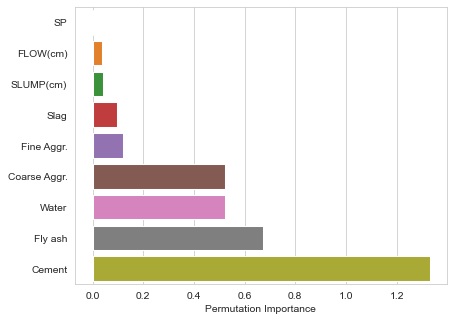

In [181]:
perm_importance = permutation_importance(pipe, X_test, y_test)

feature_names = X.columns.to_list()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot(y=features[sorted_idx], x=perm_importance.importances_mean[sorted_idx], orient="h")
plt.xlabel("Permutation Importance");